- to reduce dimensionality
- common methods: univariate statistics, model-based selection, iterative selection

### 1.Univariate Statistics

- determines the relationship between each feature and output (target)
- only the features with highest confidence are selected
- **SelectKBest** - selecting K number of features
- **lectPercentile** selection is made based on a percentage of the original features

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [3]:
select = SelectPercentile(percentile=50) #selects 50% of the features
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape))
print('X_train_selected.shape is: {}'.format(X_train_selected.shape))

X_train.shape is: (284, 80)
X_train_selected.shape is: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


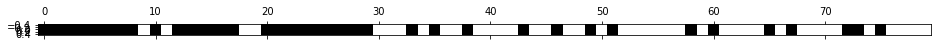

In [5]:
#To know which all features got selected
import matplotlib.pyplot as plt
%matplotlib inline

mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [7]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('The score of Logistic Regression on all features: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)
print('The score of Logistic Regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

The score of Logistic Regression on all features: 0.930
The score of Logistic Regression on the selected features: 0.940


C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2. Model-Based Feature Selection

- uses a supervised model to determine the importance of each feature
- keeps the most important features
- needs a measure for the importance of features (DT and RF have the 'feature_importances' attribute)

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [9]:
select.fit(X_train, y_train)
X_train_s = select.transform(X_train)
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

The shape of X_train is:  (284, 80)
The shape of X_train_s is  (284, 40)


Text(0.5,0,'Index of Features')

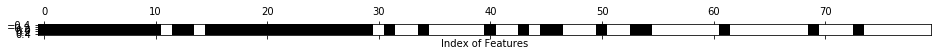

In [10]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

In [11]:
X_test_s = select.transform(X_test)
score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('The score of Logistic Regression with the selected features on the test set: {:.3f}'.format(score))

The score of Logistic Regression with the selected features on the test set: 0.951


C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
